🔁 Traversal BFS: ITPLN -> Stasiun Rawa Buaya -> Stasiun Duri -> Stasiun Kampung Bandan -> Stasiun Sudirman -> Stasiun Jakarta Kota -> Stasiun Tanjung Priok -> MRT Dukuh Atas -> Stasiun Manggarai -> MRT Blok M -> MRT Bundaran HI -> Stasiun Jatinegara -> Plaza Blok M
✅ Jalur BFS: ITPLN -> Stasiun Rawa Buaya -> Stasiun Duri -> Stasiun Sudirman -> MRT Dukuh Atas -> MRT Blok M -> Plaza Blok M
📏 Total Jarak: 21.27 km
⏱️ Total Waktu Tempuh: 41 menit


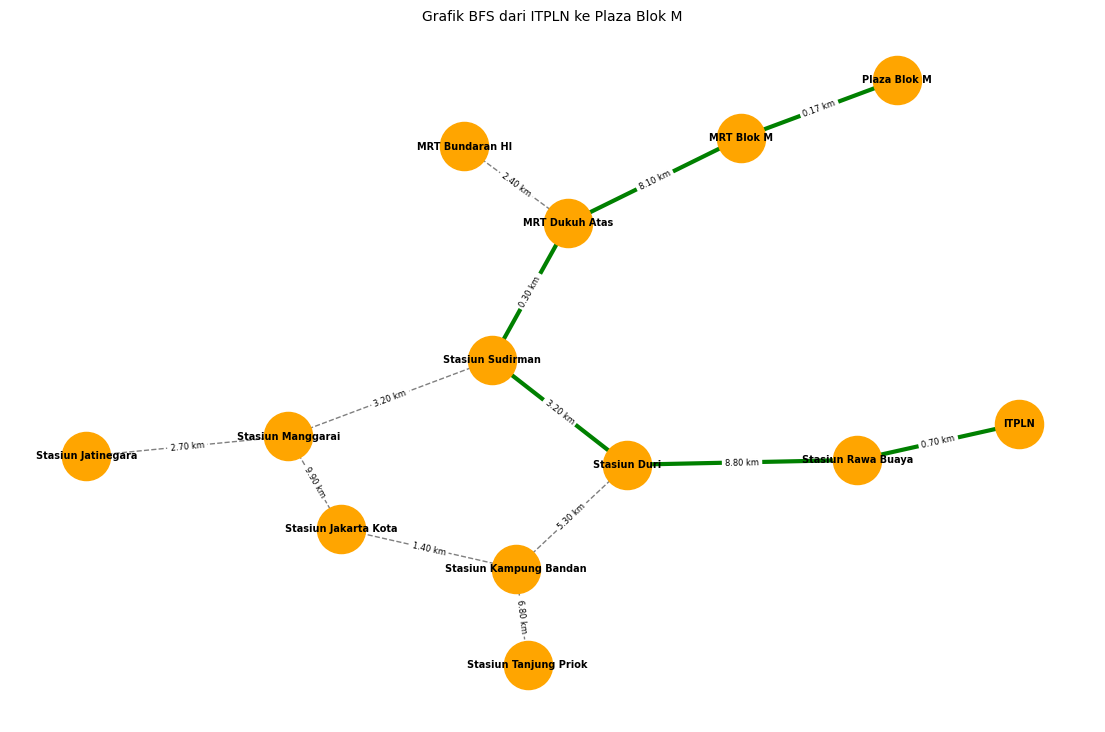

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Buat graf kosong
G = nx.Graph()

# Rute utama dan alternatif
route_optimal = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

route_alternatif = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Kampung Bandan",
    "Stasiun Jakarta Kota", "Stasiun Manggarai", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

# Jarak dan waktu antar stasiun (perkiraan)
distance_optimal = [0.7, 8.8, 3.2, 0.3, 8.1, 0.17]       # dalam kilometer
time_optimal = [5, 12, 5, 4, 13, 2]                      # dalam menit

distance_alternatif = [0.7, 8.8, 5.3, 1.4, 9.9, 3.2, 0.3, 8.1, 0.17]
time_alternatif = [5, 12, 14, 6, 22, 5, 4, 13, 2]

# Fungsi menambahkan edge dengan atribut
def add_route_edges_with_info(route, distances, times):
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1], distance=distances[i], time=times[i])

# Tambahkan rute ke graf
add_route_edges_with_info(route_optimal, distance_optimal, time_optimal)
add_route_edges_with_info(route_alternatif, distance_alternatif, time_alternatif)

# Tambahan koneksi lain
G.add_edge("Stasiun Kampung Bandan", "Stasiun Tanjung Priok", distance=6.8, time=12)
G.add_edge("Stasiun Manggarai", "Stasiun Jatinegara", distance=2.7, time=7)
G.add_edge("MRT Dukuh Atas", "MRT Bundaran HI", distance=2.4, time=5)

# Fungsi BFS
def bfs_traversal_and_shortest_path(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    traversal_order = []

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            traversal_order.append(node)
            visited.add(node)

            if node == goal:
                return traversal_order, path

            for neighbor in sorted(graph[node]):
                if neighbor not in visited:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)

    return traversal_order, None

# Fungsi hitung total jarak dan waktu
def calculate_total_distance_and_time(graph, path):
    total_distance = 0
    total_time = 0
    for i in range(len(path) - 1):
        edge_data = graph.get_edge_data(path[i], path[i + 1])
        total_distance += edge_data['distance']
        total_time += edge_data['time']
    return total_distance, total_time

# Jalankan BFS
bfs_traversal, bfs_path = bfs_traversal_and_shortest_path(G, "ITPLN", "Plaza Blok M")

# Output hasil
print("🔁 Traversal BFS:", " -> ".join(bfs_traversal))
print("✅ Jalur BFS:", " -> ".join(bfs_path))

# Hitung total jarak dan waktu
total_distance, total_time = calculate_total_distance_and_time(G, bfs_path)
print(f"📏 Total Jarak: {total_distance:.2f} km")
print(f"⏱️ Total Waktu Tempuh: {total_time} menit")

# Visualisasi Graf
plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, seed=42)

# Gambar node
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=1200)

# Gambar edge BFS (jalur utama)
path_edges = list(zip(bfs_path, bfs_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='green')

# Gambar edge lain (dashed)
other_edges = [e for e in G.edges if e not in path_edges and (e[1], e[0]) not in path_edges]
nx.draw_networkx_edges(G, pos, edgelist=other_edges, style='dashed', alpha=0.5)

# Gambar label node
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold')

# Gambar label jarak di edge
edge_labels = nx.get_edge_attributes(G, 'distance')
edge_labels = {k: f"{v:.2f} km" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Grafik BFS dari ITPLN ke Plaza Blok M", fontsize=10)
plt.axis('off')

# ✅ Simpan gambar ke file
plt.savefig("graf_bfs.png", dpi=300, bbox_inches='tight')
plt.show()

🔁 Traversal DFS: ITPLN -> Stasiun Rawa Buaya -> Stasiun Duri -> Stasiun Kampung Bandan -> Stasiun Jakarta Kota -> Stasiun Manggarai -> Stasiun Jatinegara -> Stasiun Sudirman -> MRT Dukuh Atas -> MRT Blok M -> Plaza Blok M
✅ Jalur DFS: ITPLN -> Stasiun Rawa Buaya -> Stasiun Duri -> Stasiun Kampung Bandan -> Stasiun Jakarta Kota -> Stasiun Manggarai -> Stasiun Sudirman -> MRT Dukuh Atas -> MRT Blok M -> Plaza Blok M
📏 Total Jarak: 37.87 km
⏱️ Total Waktu Tempuh: 83 menit


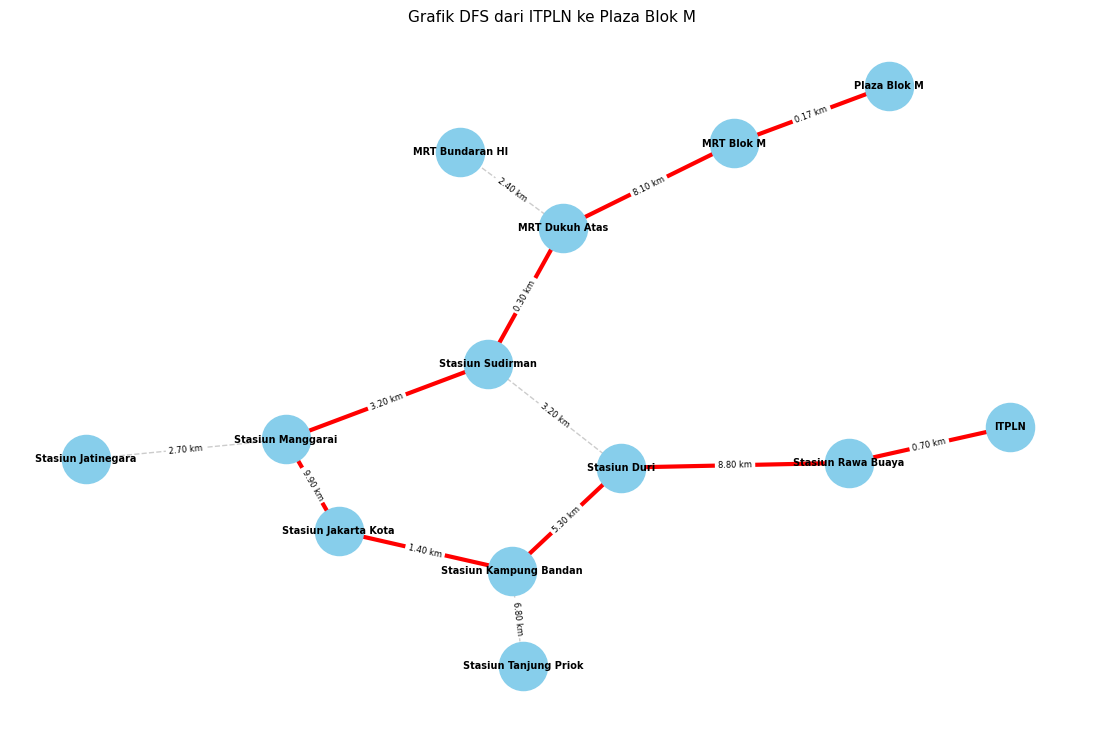

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf
G = nx.Graph()

# Rute utama dan alternatif
route_optimal = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

route_alternatif = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Kampung Bandan",
    "Stasiun Jakarta Kota", "Stasiun Manggarai", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

# Jarak dan waktu (km dan menit)
distance_optimal = [0.7, 8.8, 3.2, 0.3, 8.1, 0.17]
time_optimal = [5, 12, 5, 4, 13, 2]

distance_alternatif = [0.7, 8.8, 5.3, 1.4, 9.9, 3.2, 0.3, 8.1, 0.17]
time_alternatif = [5, 12, 14, 6, 22, 5, 4, 13, 2]

# Tambahkan edge dengan atribut jarak dan waktu
def add_route_edges_with_info(route, distances, times):
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1], distance=distances[i], time=times[i])

add_route_edges_with_info(route_optimal, distance_optimal, time_optimal)
add_route_edges_with_info(route_alternatif, distance_alternatif, time_alternatif)

# Tambahan koneksi lain
G.add_edge("Stasiun Kampung Bandan", "Stasiun Tanjung Priok", distance=6.8, time=12)
G.add_edge("Stasiun Manggarai", "Stasiun Jatinegara", distance=2.7, time=7)
G.add_edge("MRT Dukuh Atas", "MRT Bundaran HI", distance=2.4, time=5)

# DFS traversal & path
def dfs_traversal_and_path(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    traversal_order = []

    while stack:
        node, path = stack.pop()
        if node not in visited:
            visited.add(node)
            traversal_order.append(node)

            if node == goal:
                return traversal_order, path

            for neighbor in sorted(graph[node], reverse=True):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    return traversal_order, None

# Hitung total jarak dan waktu
def calculate_total_distance_and_time(graph, path):
    total_distance = 0
    total_time = 0
    for i in range(len(path) - 1):
        data = graph.get_edge_data(path[i], path[i + 1])
        total_distance += data['distance']
        total_time += data['time']
    return total_distance, total_time

# Jalankan DFS
dfs_traversal, dfs_path = dfs_traversal_and_path(G, "ITPLN", "Plaza Blok M")

# Output hasil
print("🔁 Traversal DFS:", " -> ".join(dfs_traversal))
print("✅ Jalur DFS:", " -> ".join(dfs_path))

total_distance, total_time = calculate_total_distance_and_time(G, dfs_path)
print(f"📏 Total Jarak: {total_distance:.2f} km")
print(f"⏱️ Total Waktu Tempuh: {total_time} menit")

# Visualisasi graf
plt.figure(figsize=(14, 9))
pos = nx.spring_layout(G, seed=42)

# Semua node warna biru
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1200)

# Garis DFS warna merah
path_edges = list(zip(dfs_path, dfs_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red')

# Garis lainnya warna abu-abu putus-putus
other_edges = [e for e in G.edges if e not in path_edges and (e[1], e[0]) not in path_edges]
nx.draw_networkx_edges(G, pos, edgelist=other_edges, style='dashed', alpha=0.4, edge_color='gray')

# Label nama node
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold')

# Label jarak
edge_labels = nx.get_edge_attributes(G, 'distance')
edge_labels = {k: f"{v:.2f} km" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Grafik DFS dari ITPLN ke Plaza Blok M", fontsize=11)
plt.axis('off')

# ✅ Simpan sebagai file PNG
plt.savefig("graf_dfs.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Buat graf
G = nx.Graph()

# Rute utama dan alternatif
route_optimal = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

route_alternatif = [
    "ITPLN", "Stasiun Rawa Buaya", "Stasiun Duri", "Stasiun Kampung Bandan",
    "Stasiun Jakarta Kota", "Stasiun Manggarai", "Stasiun Sudirman",
    "MRT Dukuh Atas", "MRT Blok M", "Plaza Blok M"
]

# Data jarak dan waktu (realistis)
distance_optimal = [0.7, 8.8, 3.2, 0.3, 8.1, 0.17]
time_optimal = [5, 12, 5, 4, 13, 2]

distance_alternatif = [0.7, 8.8, 5.3, 1.4, 9.9, 3.2, 0.3, 8.1, 0.17]
time_alternatif = [5, 12, 14, 6, 22, 5, 4, 13, 2]

# Tambah edge ke graf
def add_route_edges_with_info(route, distances, times):
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i + 1], distance=distances[i], time=times[i])

add_route_edges_with_info(route_optimal, distance_optimal, time_optimal)
add_route_edges_with_info(route_alternatif, distance_alternatif, time_alternatif)

# Tambahan koneksi
G.add_edge("Stasiun Kampung Bandan", "Stasiun Tanjung Priok", distance=6.8, time=12)
G.add_edge("Stasiun Manggarai", "Stasiun Jatinegara", distance=2.7, time=7)
G.add_edge("MRT Dukuh Atas", "MRT Bundaran HI", distance=2.4, time=5)

# Fungsi perhitungan jarak dan waktu
def calculate_total_distance_and_time(graph, path):
    total_distance = 0
    total_time = 0
    for i in range(len(path) - 1):
        data = graph.get_edge_data(path[i], path[i + 1])
        total_distance += data['distance']
        total_time += data['time']
    return total_distance, total_time

# Algoritma BFS
def bfs(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    traversal = []

    while queue:
        path = queue.popleft()
        node = path[-1]
        if node not in visited:
            visited.add(node)
            traversal.append(node)
            if node == goal:
                return traversal, path
            for neighbor in sorted(graph[node]):
                if neighbor not in visited:
                    queue.append(path + [neighbor])
    return traversal, None

# Algoritma DFS
def dfs(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    traversal = []

    while stack:
        node, path = stack.pop()
        if node not in visited:
            visited.add(node)
            traversal.append(node)
            if node == goal:
                return traversal, path
            for neighbor in sorted(graph[node], reverse=True):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    return traversal, None

# Jalankan BFS dan DFS
bfs_traversal, bfs_path = bfs(G, "ITPLN", "Plaza Blok M")
dfs_traversal, dfs_path = dfs(G, "ITPLN", "Plaza Blok M")

# Hitung jarak dan waktu
bfs_distance, bfs_time = calculate_total_distance_and_time(G, bfs_path)
dfs_distance, dfs_time = calculate_total_distance_and_time(G, dfs_path)

# Tampilkan hasil perbandingan
print("=== PERBANDINGAN BFS vs DFS ===")
print(f"BFS - Jumlah Node: {len(bfs_traversal)} | Jarak: {bfs_distance:.2f} km | Waktu: {bfs_time} menit")
print(f"DFS - Jumlah Node: {len(dfs_traversal)} | Jarak: {dfs_distance:.2f} km | Waktu: {dfs_time} menit")

# Kesimpulan
print("\n=== KESIMPULAN ===")
if bfs_time < dfs_time:
    print("BFS lebih efisien berdasarkan waktu tempuh.")
elif dfs_time < bfs_time:
    print("DFS lebih efisien berdasarkan waktu tempuh.")
else:
    print("Waktu tempuh BFS dan DFS sama.")

if bfs_distance < dfs_distance:
    print("BFS juga lebih pendek dari segi jarak.")
elif dfs_distance < bfs_distance:
    print("DFS juga lebih pendek dari segi jarak.")
else:
    print("Jarak tempuh BFS dan DFS sama.")

=== PERBANDINGAN BFS vs DFS ===
BFS - Jumlah Node: 13 | Jarak: 21.27 km | Waktu: 41 menit
DFS - Jumlah Node: 11 | Jarak: 37.87 km | Waktu: 83 menit

=== KESIMPULAN ===
BFS lebih efisien berdasarkan waktu tempuh.
BFS juga lebih pendek dari segi jarak.
